In [1]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import geopandas as gpd
import pandas as pd

In [3]:
data = gpd.read_file("https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_regions.geojson")

In [ ]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
data.head()

,reg_name,reg_istat_code_num,reg_istat_code,geometry
0,Piemonte,1,01,"POLYGON ((7.13605 45.27996, 7.13608 45.27952, ..."
1,Valle d'Aosta/Vallée d'Aoste,2,02,"POLYGON ((7.73455 45.92365, 7.73324 45.92345, ..."
2,Lombardia,3,03,"MULTIPOLYGON (((8.57964 45.75172, 8.58243 45.7..."
3,Trentino-Alto Adige/Südtirol,4,04,"POLYGON ((12.01396 46.55091, 12.02158 46.55966..."
4,Veneto,5,05,"POLYGON ((10.63538 45.53543, 10.63673 45.52090..."


In [5]:
dati=pd.read_csv('prova2.csv', sep=';')
df = dati.groupby(['COD_REGIONE']).size().reset_index(name='counts')
df

,COD_REGIONE,counts
0,1,8
1,3,7
2,4,7
3,5,318
4,6,106
5,7,174
6,8,272
7,9,126
8,10,8
9,11,181


In [ ]:
data2 = pd.merge(left=data, right=df,left_on='reg_istat_code_num', right_on='COD_REGIONE')

In [ ]:
data2

,reg_name,reg_istat_code_num,reg_istat_code,geometry,COD_REGIONE,counts
0,Piemonte,1,01,"POLYGON ((7.13605 45.27996, 7.13608 45.27952, ...",1,8
1,Lombardia,3,03,"MULTIPOLYGON (((8.57964 45.75172, 8.58243 45.7...",3,7
2,Trentino-Alto Adige/Südtirol,4,04,"POLYGON ((12.01396 46.55091, 12.02158 46.55966...",4,7
3,Veneto,5,05,"POLYGON ((10.63538 45.53543, 10.63673 45.52090...",5,318
4,Friuli-Venezia Giulia,6,06,"MULTIPOLYGON (((13.51691 46.38301, 13.52109 46...",6,106
5,Liguria,7,07,"MULTIPOLYGON (((7.55166 43.89429, 7.54683 43.8...",7,174
6,Emilia-Romagna,8,08,"MULTIPOLYGON (((9.33258 44.73504, 9.33055 44.7...",8,272
7,Toscana,9,09,"MULTIPOLYGON (((9.89786 44.16359, 9.90268 44.1...",9,126
8,Umbria,10,10,"MULTIPOLYGON (((13.15849 42.65425, 13.16034 42...",10,8
9,Marche,11,11,"POLYGON ((12.50082 43.51963, 12.50364 43.51837...",11,181


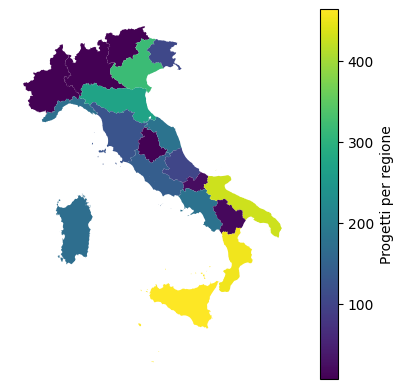

In [ ]:
ax=data2.plot(column="counts",
    legend=True,
    legend_kwds={'label': "Progetti per regione",
                        #'orientation': "horizontal"
                        })
ax.set_axis_off();

In [9]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

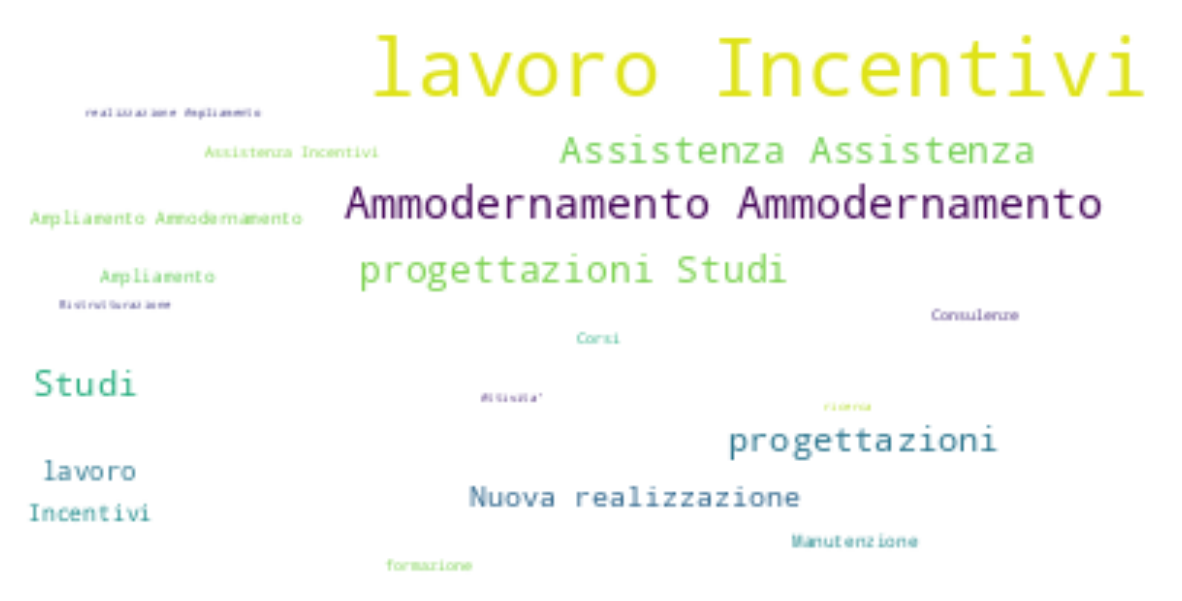

In [11]:
text = " ".join(i for i in dati['CUP_DESCR_TIPOLOGIA'])
stopwords = set(STOPWORDS)
stopwords.update(["Altro","di","al","e"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()